In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
##from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd. read_csv(r"C:\Users\Vivian\OneDrive\桌面\movies_metadata.csv\movies_metadata.csv", encoding = "ISO-8859-1")
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [4]:
# pd.Series將不同的種類genres建立不同的column，stack壓縮起來
# .reset_index(level=1, drop=True)更乾淨
# s替代genres項目
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [5]:
unique_genres =set(genre for sublist in df['genres'] for genre in sublist)

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_data = mlb.fit_transform(df['genres'])
genre_df = pd.DataFrame(genre_data, columns=mlb.classes_)

In [7]:
genre_df

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45463,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# notnull()丟去vote_count中n/a的項目
# 取乾淨的資料轉換成整數
# ;對vote_avg做一樣的事情
# 取全局平均(C)
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [9]:
# 門檻篩去vote_counts(0.95)的數量
m = vote_counts.quantile(0.8)
m

50.0

In [10]:
# 條件：vote_counts >=m && vote_count/avg not_null
# 取title, year, vote_count, vote_avg, popularity, genres
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(9151, 5)

In [11]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
# weighted_rating (wr)
# apply像是def函數，以row為單位傳入
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [12]:
# qualified = qualified.sort_values('wr', ascending=False).head(3000)
qualified_genre = pd.merge(genre_df, qualified, left_index =True, right_index=True, how='inner')


In [13]:
qualified_genre.shape

(9151, 38)

Index(['Horror', 'Crime', 'Romance', 'Music', 'War', 'History', 'Fantasy',
       'Comedy', 'Family', 'Animation', 'Mystery', 'Action', 'Adventure',
       'Western', 'Science Fiction', 'Drama', 'Thriller', 'title',
       'vote_count', 'vote_average', 'popularity', 'genres', 'wr'],
      dtype='object')

In [14]:
def movie_recommendation(selected_genres):
    filtered_movies = pd.DataFrame()
    for genre in selected_genres:
        if genre in qualified_genre.columns:
            choosen_movies = qualified_genre[qualified_genre[genre] == 1]
            filtered_movies = pd.concat([filtered_movies, choosen_movies])

    ranked_movies = filtered_movies.sort_values(by='wr', ascending=False)
    ranked_cleaned = ranked_movies.drop_duplicates(subset =['title'])
    top_movies = ranked_cleaned[:10].loc[:,['title', 'genres', 'wr', 'vote_count']]
    return top_movies

mood_selection ={ 'sad' : ['Comedy', 'Family', 'Fantasy'],
                 'happy': ['Drama', 'Adventure', 'Music'],
                 'brave' : ['Thriller', 'Horror', 'Crime'],
                 'relaxed' : ['Drama', 'Comedy', 'Romance'],
                 'angry' : ['Action', 'Adventure', 'Crime'],
                 'lonely' : ['History', 'Science Fiction', 'War'],
                 'exhausted' : ['Music', 'Adventure', 'Animation'],}

mood ='happy'
print(f'Recommendation based on {mood}: ')
movie_recommendation(mood_selection.get(mood, 'relaxed'))

Recommendation based on happy: 


,title,genres,wr,vote_count
10309,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",8.735928,661
15480,Inception,"[Action, Thriller, Science Fiction, Mystery, A...",7.990247,14075
12481,The Dark Knight,"[Drama, Action, Crime, Thriller]",7.988818,12269
22879,Interstellar,"[Adventure, Drama, Science Fiction]",7.987741,11187
2843,Fight Club,[Drama],7.985839,9678
4863,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]",7.984595,8892
314,The Shawshank Redemption,"[Drama, Crime]",7.983616,8358
7000,The Lord of the Rings: The Return of the King,"[Adventure, Fantasy, Action]",7.983355,8226
351,Forrest Gump,"[Comedy, Drama, Romance]",7.983194,8147
5814,The Lord of the Rings: The Two Towers,"[Adventure, Fantasy, Action]",7.982089,7641


In [15]:
mood ='sad'
print(f'Recommendation based on {mood}: ')
movie_recommendation(mood_selection.get(mood, 'relaxed'))

Recommendation based on sad: 


,title,genres,wr,vote_count
10309,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",8.735928,661
4863,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]",7.984595,8892
7000,The Lord of the Rings: The Return of the King,"[Adventure, Fantasy, Action]",7.983355,8226
351,Forrest Gump,"[Comedy, Drama, Romance]",7.983194,8147
5814,The Lord of the Rings: The Two Towers,"[Adventure, Fantasy, Action]",7.982089,7641
1225,Back to the Future,"[Adventure, Comedy, Science Fiction, Family]",7.978096,6239
359,The Lion King,"[Family, Animation, Drama]",7.975268,5520
18465,The Intouchables,"[Drama, Comedy]",7.974770,5410
22841,The Grand Budapest Hotel,"[Comedy, Drama]",7.970653,4644
3030,The Green Mile,"[Fantasy, Drama, Crime]",7.967326,4166


In [16]:
import matplotlib.pyplot as plt

genres =['Horror', 'Crime', 'Romance', 'Music', 'War', 'History', 'Fantasy',
       'Comedy', 'Family', 'Animation', 'Mystery', 'Action', 'Adventure',
       'Western', 'Science Fiction', 'Drama', 'Thriller']
column_counts = qualified_genre[unique_genres].apply(pd.Series.value_counts)
column_counts = column_counts.iloc[1].dropna()
column_counts

Documentary         201.0
TV Movie             70.0
War                 277.0
Science Fiction    1000.0
Horror             1291.0
Crime              1344.0
Animation           679.0
Comedy             3266.0
Fantasy             862.0
Romance            1494.0
Mystery             724.0
Foreign               3.0
Drama              4226.0
Action             2038.0
Family              935.0
Western             154.0
Adventure          1365.0
History             347.0
Thriller           2539.0
Music               281.0
Name: 1, dtype: float64

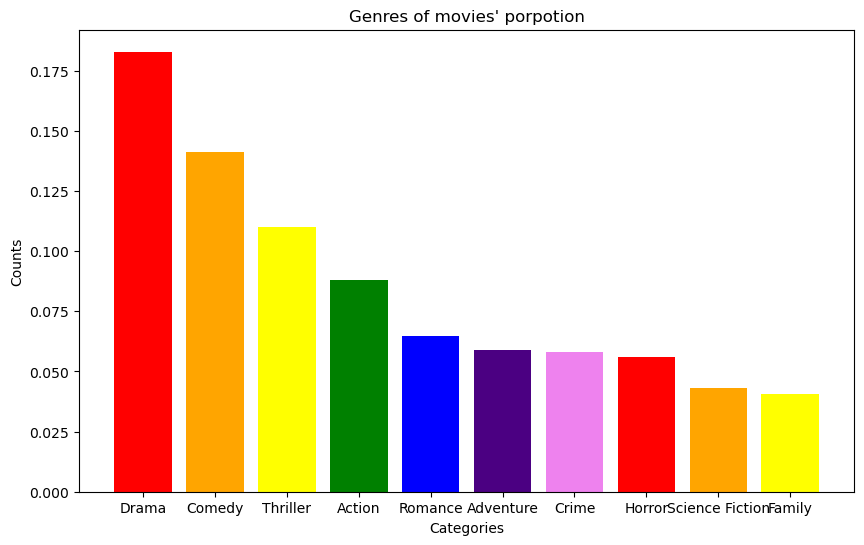

In [17]:
import matplotlib.pyplot as plt

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
column_counts_sorted = column_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6)) 
plt.bar(column_counts_sorted.index[:10], column_counts_sorted[:10].apply(lambda x: x/sum(column_counts)), color=colors)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Genres of movies\' porpotion')
plt.show()
